# Trabalho APS - Ciência das Redes
Cristian Veggian Matias - 2150913

João Pedro Moreto Lourenção - 2150980

Professores: Thiago H. Silva e Ricardo Luders

# 1. Introdução

League of Legends, um dos jogos mais populares do gênero MOBA (Multiplayer Online Battle Arena), cativa milhões de jogadores ao redor do mundo com sua complexidade estratégica e diversidade de escolhas. No universo competitivo de League of Legends, a habilidade individual é apenas parte da equação para o sucesso. Este trabalho se propõe a explorar e desvendar as intricadas teias táticas que se formam dentro do jogo, focalizando três aspectos cruciais para o êxito: o sistema de composições, a importância de bons companheiros de time e as decisões estratégicas na escolha de campeões.

#### 1.1 Sistema de Composições: A Arte da Sinergia
League of Legends transcende o simples confronto entre jogadores; é uma batalha onde a estratégia é tão vital quanto a destreza mecânica. As composições de times, cuidadosamente elaboradas, moldam o campo de jogo de maneira única. Neste contexto, analisaremos como diferentes papéis se entrelaçam para criar sinergias poderosas, explorando o papel fundamental de tanques, assassinos, magos e atiradores na construção de uma equipe coesa.

#### 1.2 Bons Companheiros de Time: Cooperação e Confiança
Em League of Legends, a cooperação entre os membros de uma equipe é essencial para superar os desafios apresentados pelos adversários. Investigaremos como a comunicação eficaz, a compreensão dos pontos fortes e fracos dos companheiros de equipe, e a confiança mútua são elementos cruciais para alcançar o sucesso. Além disso, abordaremos a importância de estratégias coordenadas e execução precisa para dominar o campo de batalha virtual.

#### 1.4 Escolhas Estratégicas: O Xadrez Dinâmico de Campeões
A seleção de campeões é um dos momentos mais estratégicos e influentes em League of Legends. Cada escolha molda a dinâmica do jogo, influenciando o curso da partida. Analisaremos como decisões inteligentes na escolha de campeões podem criar vantagens estratégicas, adaptando-se aos oponentes e aproveitando as fraquezas inerentes às suas composições.

# 2. Proposta

O que se deseja fazer

Descrição da Rede

Montagem da rede

# 3. Metodologia

### 3.1. Instalando as bibliotecas necessárias

In [2]:
%pip install networkx
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 3.2. Criando os nós do grafo

In [3]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

nodes = open("GrafoLol - Nós.csv", 'r', encoding='utf8')
nodes = csv.reader(nodes)
nodes = list(nodes)

G = nx.DiGraph()

for x in nodes:
    G.add_node(int(x[1]), Nome = x[0], Posicao1 = x[2], Posicao2 = x[3])

print(G.nodes(data=True))

print(G.edges(data=True))



[(1, {'Nome': 'Aatrox', 'Posicao1': 'Top', 'Posicao2': ''}), (2, {'Nome': 'Ahri', 'Posicao1': 'Mid', 'Posicao2': ''}), (3, {'Nome': 'Akali', 'Posicao1': 'Mid', 'Posicao2': 'Top'}), (4, {'Nome': 'Akshan', 'Posicao1': 'Mid', 'Posicao2': ''}), (5, {'Nome': 'Alistar', 'Posicao1': 'Sup', 'Posicao2': ''}), (6, {'Nome': 'Amumu', 'Posicao1': 'Jungle', 'Posicao2': ''}), (7, {'Nome': 'Anivia', 'Posicao1': 'Mid', 'Posicao2': ''}), (8, {'Nome': 'Annie', 'Posicao1': 'Mid', 'Posicao2': ''}), (9, {'Nome': 'Aphelios', 'Posicao1': 'Adc', 'Posicao2': ''}), (10, {'Nome': 'Ashe', 'Posicao1': 'Adc', 'Posicao2': 'Sup'}), (11, {'Nome': 'Aurelion Sol', 'Posicao1': 'Mid', 'Posicao2': ''}), (12, {'Nome': 'Azir', 'Posicao1': 'Mid', 'Posicao2': ''}), (13, {'Nome': 'Bardo', 'Posicao1': 'Sup', 'Posicao2': ''}), (14, {'Nome': "Bel'veth", 'Posicao1': 'Jungle', 'Posicao2': ''}), (15, {'Nome': 'Brand', 'Posicao1': 'Sup', 'Posicao2': ''}), (16, {'Nome': 'Braum', 'Posicao1': 'Sup', 'Posicao2': ''}), (17, {'Nome': 'Briar'

### 3.3. Adicionando as arestas no grafo

In [4]:
links = open("GrafoLol - Arestas.csv", 'r', encoding = 'utf8')
links = csv.reader(links)
links = list(links)

for link in links:
    winrate = link[3]
    winrate = winrate[:-1]
    winrate = winrate.replace(',','.')
    G.add_edge(int(link[1]), int(link[2]), winrate=float(winrate))


### 3.4. Visualizando o gráfico com o Matplotlib

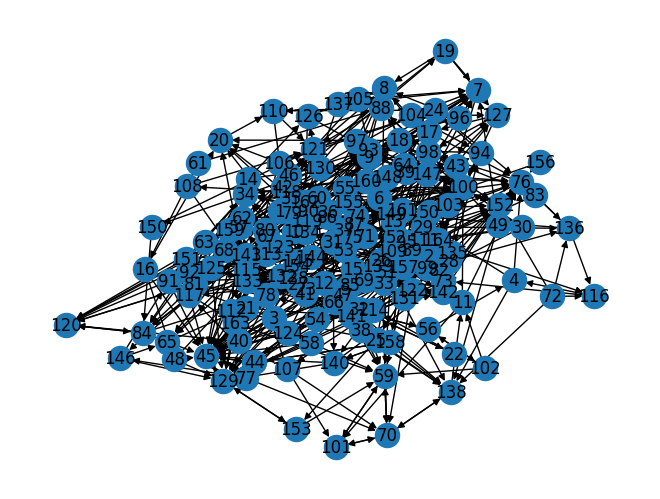

In [5]:
nx.draw(G, with_labels=True)
plt.show()

### 3.5 Medidas de Centralidade

#### 3.5.1 Cálculo dos nós com maior e menor grau de entrada

In [6]:
#nós com maiores graus de entrada
in_degrees = G.in_degree()
in_degrees = sorted(in_degrees, key=lambda tupla: tupla[1], reverse=True)

print(in_degrees)

#nós com maiores graus de entrada
out_degrees = G.out_degree()
out_degrees = sorted(out_degrees, key=lambda tupla: tupla[1], reverse=True)

print(out_degrees)


[(45, 33), (133, 25), (129, 20), (93, 18), (100, 17), (7, 16), (98, 15), (76, 14), (121, 13), (152, 13), (8, 12), (95, 12), (164, 12), (59, 11), (117, 11), (142, 10), (34, 9), (138, 9), (161, 9), (57, 8), (84, 8), (120, 8), (24, 7), (31, 7), (70, 7), (82, 7), (91, 7), (149, 7), (17, 6), (20, 6), (74, 6), (89, 6), (162, 6), (27, 5), (42, 5), (43, 5), (65, 5), (115, 5), (127, 5), (132, 5), (6, 4), (86, 4), (88, 4), (94, 4), (101, 4), (136, 4), (158, 4), (11, 3), (33, 3), (44, 3), (46, 3), (78, 3), (116, 3), (122, 3), (140, 3), (4, 2), (19, 2), (25, 2), (32, 2), (36, 2), (48, 2), (56, 2), (64, 2), (73, 2), (110, 2), (126, 2), (134, 2), (143, 2), (146, 2), (153, 2), (16, 1), (22, 1), (55, 1), (63, 1), (77, 1), (80, 1), (81, 1), (102, 1), (103, 1), (105, 1), (107, 1), (108, 1), (114, 1), (119, 1), (128, 1), (135, 1), (141, 1), (148, 1), (150, 1), (157, 1), (163, 1), (1, 0), (2, 0), (3, 0), (5, 0), (9, 0), (10, 0), (12, 0), (13, 0), (14, 0), (15, 0), (18, 0), (21, 0), (23, 0), (26, 0), (28, 

ANÁLISE: No contexto da rede, o grau de entrada define os melhores campeões a serem escolhidos primeiro (first pick), visto que há mais possibilidades de que os outros jogadores escolham boas combinações no futuro. Dessa forma, segundo o cálculo realizado, os melhores campeões a serem escolhidos primeiro são o Ivern (grau de entrada = 33, 20.13% de chance de escolha de um bom parceiro), Trundle (grau de entrada = 25, 15.24% de chance de escolha de um bom parceiro) e Taric (grau de entrada = 20, 12.19% de chance de escolha de um bom parceiro).

#### 3.5.2 Cálculo de Centralidade (Betweenness)

In [7]:
betweenness_centrality = nx.betweenness_centrality(G)

top_choices = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

for node_id, centrality in top_choices:
    name = G.nodes[node_id]['Nome']
    position = G.nodes[node_id]['Posicao1']
    print(f"Nome: {name}, Posição: {position}, Probabilidade: {centrality*100}")

Nome: Fiddlesticks, Posição: Jungle, Probabilidade: 7.0389290433030505
Nome: Trundle, Posição: Top, Probabilidade: 6.311267040078676
Nome: Quinn, Posição: Top, Probabilidade: 6.1522212965066885
Nome: Tahm Kench, Posição: Top, Probabilidade: 5.129443885408438
Nome: Zilean, Posição: Sup, Probabilidade: 4.695532761313267
Nome: Maokai, Posição: Jungle, Probabilidade: 4.365357380297169
Nome: Ivern, Posição: Jungle, Probabilidade: 4.318013642882994
Nome: Kog'maw, Posição: Adc, Probabilidade: 4.181931956301418
Nome: Ekko, Posição: Jungle, Probabilidade: 3.9022907251718886
Nome: Rammus, Posição: Jungle, Probabilidade: 3.7148077817811966
Nome: Taric, Posição: Sup, Probabilidade: 3.6945682739252383
Nome: Sona, Posição: Sup, Probabilidade: 3.3833385029135985
Nome: Annie, Posição: Mid, Probabilidade: 3.247674590551209
Nome: Briar, Posição: Jungle, Probabilidade: 3.2346048697446115
Nome: Galio, Posição: Mid, Probabilidade: 2.9787872886032387
Nome: Warwick, Posição: Jungle, Probabilidade: 2.84421289

ANÁLISE: A centralidade define o número de vezes que um vértice está localizado no caminho mais curto entre dois outros vértices. Dessa forma, no contexto da rede, essa medida dita a probabilidade de um campeão ser escolhido caso algoritmos de geração de composições de times sejam aplicados à rede. Nesse caso, o campeão com maior probabilidade de ser escolhido é o Fiddlesticks, com ~7.7% de chance.

### 3.6 Análise de Comunidades

#### 3.6.1 Análise a partir do algoritmo de Louvain

In [8]:
communities_louvain = nx.community.louvain_communities(G, weight='winrate', resolution=3, seed=123456)

# Imprime as comunidades
indice = 1
for community in communities_louvain:
    print(f"Comunidade {indice}")
    for ind in community:
        print(f"{G.nodes[ind]['Nome']} ({G.nodes[ind]['Posicao1']}) | ", end='')
    print("")
    indice +=1



Comunidade 1
Briar (Jungle) | Zilean (Sup) | Warwick (Jungle) | Neeko (Mid) | Anivia (Mid) | Udyr (Jungle) | 
Comunidade 2
Braum (Sup) | Jax (Top) | Kog'maw (Adc) | Viktor (Mid) | Ekko (Jungle) | Kennen (Top) | 
Comunidade 3
Caitlyn (Adc) | Cassiopeia (Mid) | Riven (Top) | Nunu e Willump (Jungle) | Vex (Mid) | 
Comunidade 4
Seraphine (Sup) | Ziggs (Mid) | Naafiri (Mid) | Alistar (Sup) | Darius (Top) | Dr. Mundo (Top) | Brand (Sup) | 
Comunidade 5
Rakan (Sup) | Gnar (Top) | Renekton (Top) | Master Yi (Jungle) | Bardo (Sup) | Elise (Jungle) | Pantheon (Top) | Taliyah (Jungle) | 
Comunidade 6
Fiora (Top) | Shaco (Jungle) | Thresh (Sup) | Garen (Top) | Corki (Mid) | Twisted Fate (Mid) | Malzahar (Mid) | 
Comunidade 7
Galio (Mid) | Zoe (Mid) | Jarvan IV (Jungle) | Mordekaiser (Top) | Volibear (Top) | Xayah (Adc) | Yasuo (Mid) | Olaf (Top) | 
Comunidade 8
Nocturne (Jungle) | Illaoi (Top) | Zyra (Sup) | Vel'koz (Sup) | 
Comunidade 9
Akali (Mid) | Tristana (Adc) | K'sante (Top) | Irelia (Top) 

ANÁLISE: As comunidades indicam campeões que se relacionam entre si através de boas taxas de vitória, dessa forma, sendo bons potenciais para escolha de composições de times. Um exemplo é a comunidade 1, que possui uma composição aceitável de time:

Rota do Topo: Jax (ou Kennen)

Selva       : Ekko

Rota do Meio: Viktor

Atirador    : Kog'maw

Suporte     : Braum

Como as composições de times devem ter exatamente 5 campeões, o parâmetro de resolução escolhido foi maior que 1, para favorecer comunidades menores. O peso considerado na criação das comunidades foi a taxa de vitória. A seed foi travada no valor 123456, para facilitar a análise das comunidades neste relatório.

## 4. Resultados

### 4.1 Geração de Composições através de buscas em Profundidade

Escolha de campeões baseado na posição e na maior taxa de vitória a partir de um determinado nó

In [56]:
# Insira o ID do campeão que foi escolhido primeiro (1 a 164)
no_inicial = 101

In [59]:
arestas = list(nx.dfs_edges(G, source=no_inicial, depth_limit=5))

posicoes_faltantes = ["Top", "Jungle", "Mid", "Adc", "Sup"]

composicao = [no_inicial]

posicoes_faltantes.remove(G.nodes[no_inicial]["Posicao1"])

for aresta in arestas:
    if len(composicao) == 5:
        break
    if G.nodes[aresta[1]]["Posicao1"] in posicoes_faltantes:
        composicao.append(aresta[1])
        posicoes_faltantes.remove(G.nodes[aresta[1]]["Posicao1"])

for campeao in composicao:
    print(f"{G.nodes[campeao]['Nome']} ({G.nodes[campeao]['Posicao1']})")


Rek'sai (Jungle)
Kayle (Top)
Lissandra (Mid)
Vel'koz (Sup)


### 4.2 Geração de Composições através de buscas em Largura

Escolha de campeões baseado na posição e na maior taxa de vitória a partir de um determinado nó

In [58]:
arestas = list(nx.bfs_edges(G, source=no_inicial, depth_limit=5))

posicoes_faltantes = ["Top", "Jungle", "Mid", "Adc", "Sup"]

composicao = [no_inicial]

posicoes_faltantes.remove(G.nodes[no_inicial]["Posicao1"])

for aresta in arestas:
    if len(composicao) == 5:
        break
    if G.nodes[aresta[1]]["Posicao1"] in posicoes_faltantes:
        composicao.append(aresta[1])
        posicoes_faltantes.remove(G.nodes[aresta[1]]["Posicao1"])

for campeao in composicao:
    print(f"{G.nodes[campeao]['Nome']} ({G.nodes[campeao]['Posicao1']})")

Rek'sai (Jungle)
Kayle (Top)
Lissandra (Mid)
Vel'koz (Sup)
Nilah (Adc)


### 4.3 Discussões

